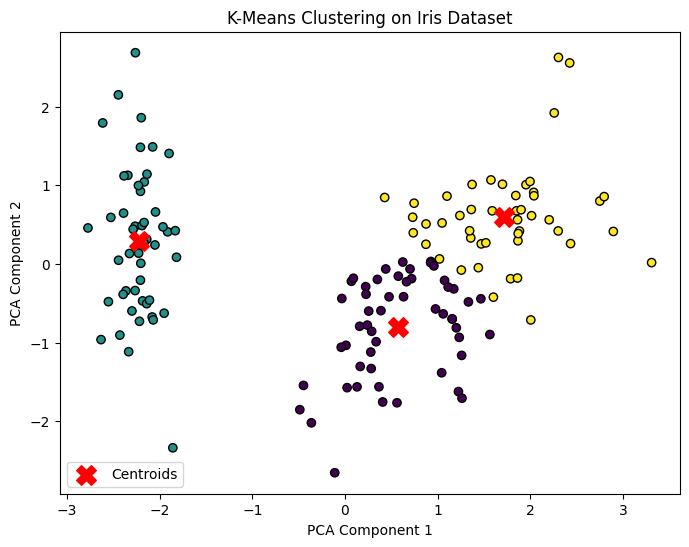

Cluster 0: 53 points
Cluster 1: 50 points
Cluster 2: 47 points


In [1]:

# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features only (unsupervised learning)

# Standardize features for better clustering performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means clustering
k = 3  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
kmeans.fit(X_scaled)

# Get cluster labels and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Reduce dimensions using PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
centroids_pca = pca.transform(centroids)

# Plot the clustered data
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', edgecolors='k')
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], marker='X', s=200, c='red', label='Centroids')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-Means Clustering on Iris Dataset')
plt.legend()
plt.show()

# Print cluster assignments
for i in range(k):
    print(f'Cluster {i}: {sum(labels == i)} points')

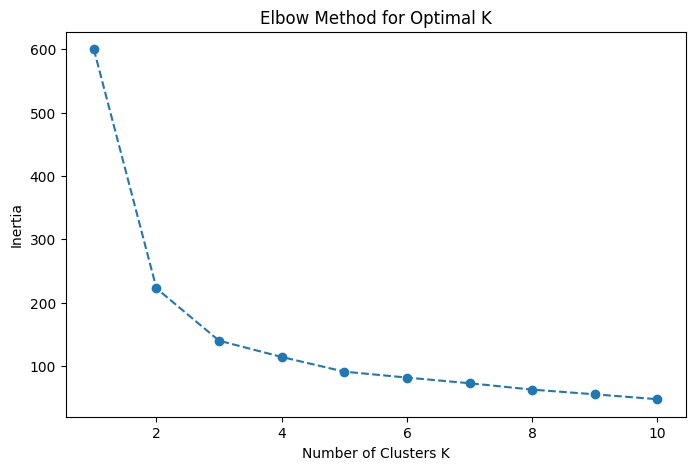

In [10]:
inertias = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K_range, inertias, marker='o', linestyle='--')
plt.xlabel('Number of Clusters K')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()


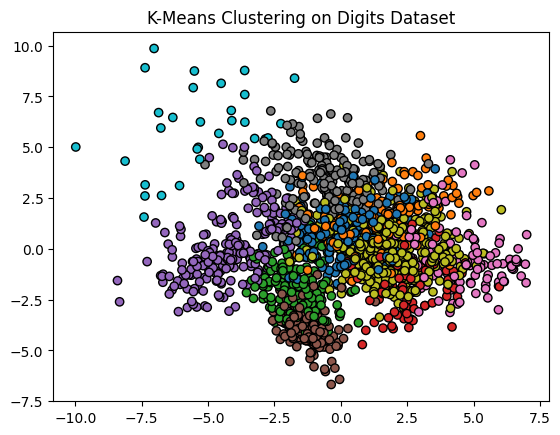

In [11]:
from sklearn.datasets import load_digits

digits = load_digits()
X_digits = digits.data  # Features

# Standardize the data
X_digits_scaled = StandardScaler().fit_transform(X_digits)

# Apply K-Means
kmeans_digits = KMeans(n_clusters=10, random_state=42, n_init=10)
labels_digits = kmeans_digits.fit_predict(X_digits_scaled)

# PCA for visualization
X_digits_pca = PCA(n_components=2).fit_transform(X_digits_scaled)

# Plot clusters
plt.scatter(X_digits_pca[:, 0], X_digits_pca[:, 1], c=labels_digits, cmap='tab10', edgecolors='k')
plt.title("K-Means Clustering on Digits Dataset")
plt.show()


DBSCAN found 2 clusters.


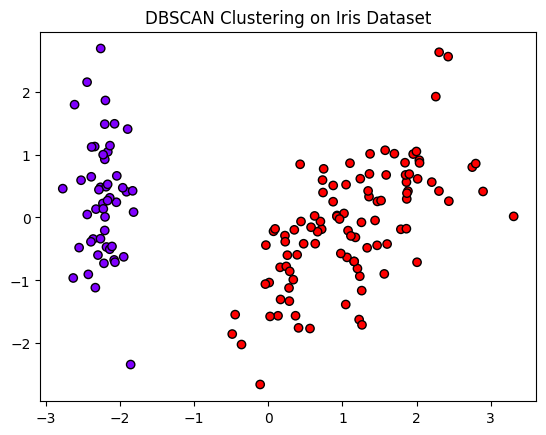

In [12]:
from sklearn.cluster import DBSCAN

# Apply DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=5)  # Tune hyperparameters
labels_dbscan = dbscan.fit_predict(X_scaled)

# Count unique clusters
num_clusters_dbscan = len(set(labels_dbscan)) - (1 if -1 in labels_dbscan else 0)  # Exclude noise (-1)
print(f"DBSCAN found {num_clusters_dbscan} clusters.")

# Plot DBSCAN clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_dbscan, cmap='rainbow', edgecolors='k')
plt.title("DBSCAN Clustering on Iris Dataset")
plt.show()
